# Programming Assignment - 6
---
## Name: Patrick McElroy
---

In [1]:
# Import required packages
from __future__ import print_function
from __future__ import division 

import pandas as pd
import numpy as np
#from scipy.sparse.linalg import svds as sparse_svd
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_boston,load_iris

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

np.random.seed(100)

## Question 1
---
(An open ended asignment) Visit the University of California open source [data repository](https://archive.ics.uci.edu/ml/datasets.php). Pick up an appropriate dataset of you choice preferably one with default-task 'classification'. Follow the example provided during the class to get some insight from the data that you have selected.  In the process of doing so utilize any tools and techniques at your disposal including (and not limited to)...

>- Observation of covariance and correlation between different features (columns, explanatory variables).

>- Distribution of different features and observations.

>- Utilize PCA to describe low-dimension representations.

>- Use plots such as Scree-plot, Bi-plot etc.

>- Discuss and clustering behaviours around the classes exposed by the first few PCs.

>- Anything else that you find interesting.

In [2]:
# Your code comes here
col_names = ['class','mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2'] 

df_ecoli = pd.read_csv("ecoli.csv", skiprows=0, names=col_names)
df_ecoli.info()
df_ecoli.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   336 non-null    object 
 1   mcg     336 non-null    float64
 2   gvh     336 non-null    float64
 3   lip     336 non-null    float64
 4   chg     336 non-null    float64
 5   aac     336 non-null    float64
 6   alm1    336 non-null    float64
 7   alm2    336 non-null    float64
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


,class,mcg,gvh,lip,chg,aac,alm1,alm2
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35
5,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46
6,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34
7,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39
8,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57
9,ARAC_ECOLI,0.42,0.40,0.48,0.5,0.56,0.18,0.30


In [3]:
#Correlation between features
ecoli_corr =df_ecoli.corr()
corr =ecoli_corr.values

/var/folders/80/q5zbz2x55cv8zcxjj9h4bvv80000gn/T/ipykernel_29214/4286721873.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

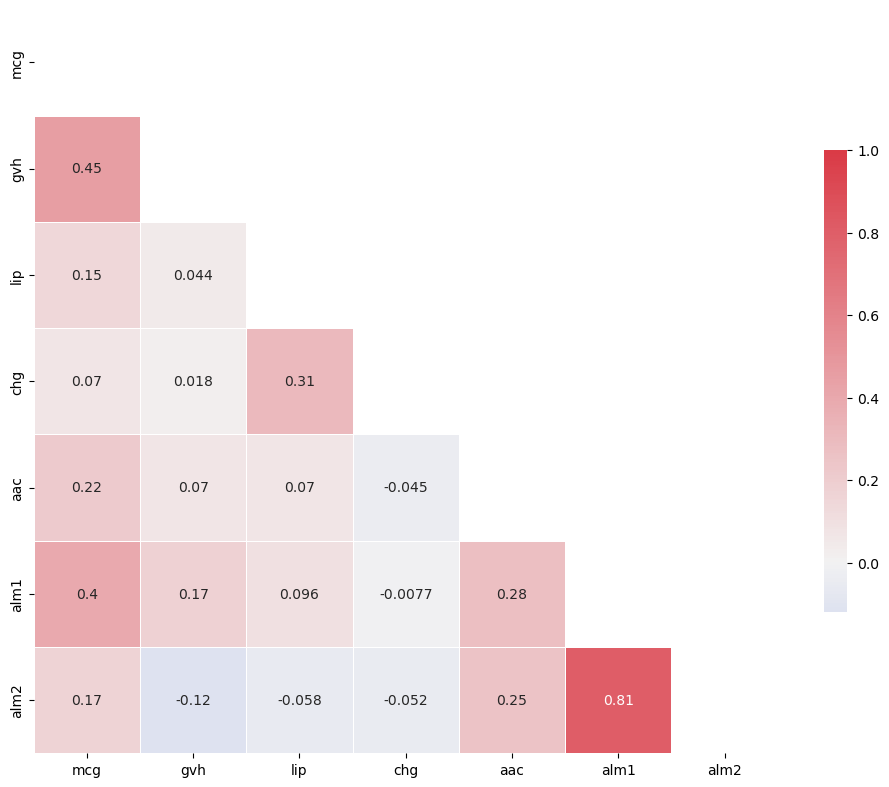

In [4]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(ecoli_corr, mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
#Covariance
data_mat = df_ecoli.values
X = data_mat[:,1:]

In [6]:
#Covariance
np.set_printoptions(precision=2, suppress=True)
#sigmaX = np.std(X, axis = 0)
muX = np.mean(X, axis = 0)
n = X.shape[0]
S = np.dot((X-muX).T, (X-muX))/(n-1)
print(f'The size of the data set is {n}')
print('The Sample Covariance Matrix')
print(S)

The size of the data set is 336
The Sample Covariance Matrix
[[0.037882384506041214 0.013114925373134335 0.002529225302061127
  0.00037304548685145733 0.005256714641080313 0.01667013859275054
  0.006810165245202566]
 [0.013114925373134335 0.021950447761194036 0.0005743283582089547
  7.462686567164198e-05 0.0012659701492537328 0.005545671641791047
  -0.0037292537313432877]
 [0.002529225302061127 0.0005743283582089547 0.007831414356787508
  0.0007530206112295694 0.000760135039090262 0.0018288699360341164
  -0.0010668869936034083]
 [0.00037304548685145733 7.462686567164198e-05 0.0007530206112295694
  0.0007440476190476189 -0.00014929815209665945 -4.504264392324103e-05
  -0.0002981076759061832]
 [0.005256714641080313 0.0012659701492537328 0.000760135039090262
  -0.00014929815209665945 0.014975820007107338 0.007379099147121546
  0.006475231876332627]
 [0.01667013859275054 0.005545671641791047 0.0018288699360341164
  -4.504264392324103e-05 0.007379099147121546 0.046548624733475465
  0.036565

In [7]:
#PCA
pca = PCA(n_components = 6)
pca.fit((X-muX).T)

Xpca = pca.transform(X.T)
print('The PCA Components')
print(pca.components_)
print('The Explained Variance Ratio')
print(pca.explained_variance_ratio_)

The PCA Components
[[-0.03  0.   -0.01 ... -0.04 -0.04 -0.02]
 [-0.03 -0.12  0.   ...  0.04  0.04  0.1 ]
 [-0.1   0.04 -0.06 ...  0.01  0.02  0.06]
 [ 0.    0.04 -0.02 ... -0.01 -0.01 -0.05]
 [-0.02  0.01 -0.03 ... -0.03 -0.02 -0.07]
 [ 0.02  0.    0.01 ... -0.    0.01 -0.02]]
The Explained Variance Ratio
[0.47 0.24 0.12 0.09 0.06 0.02]


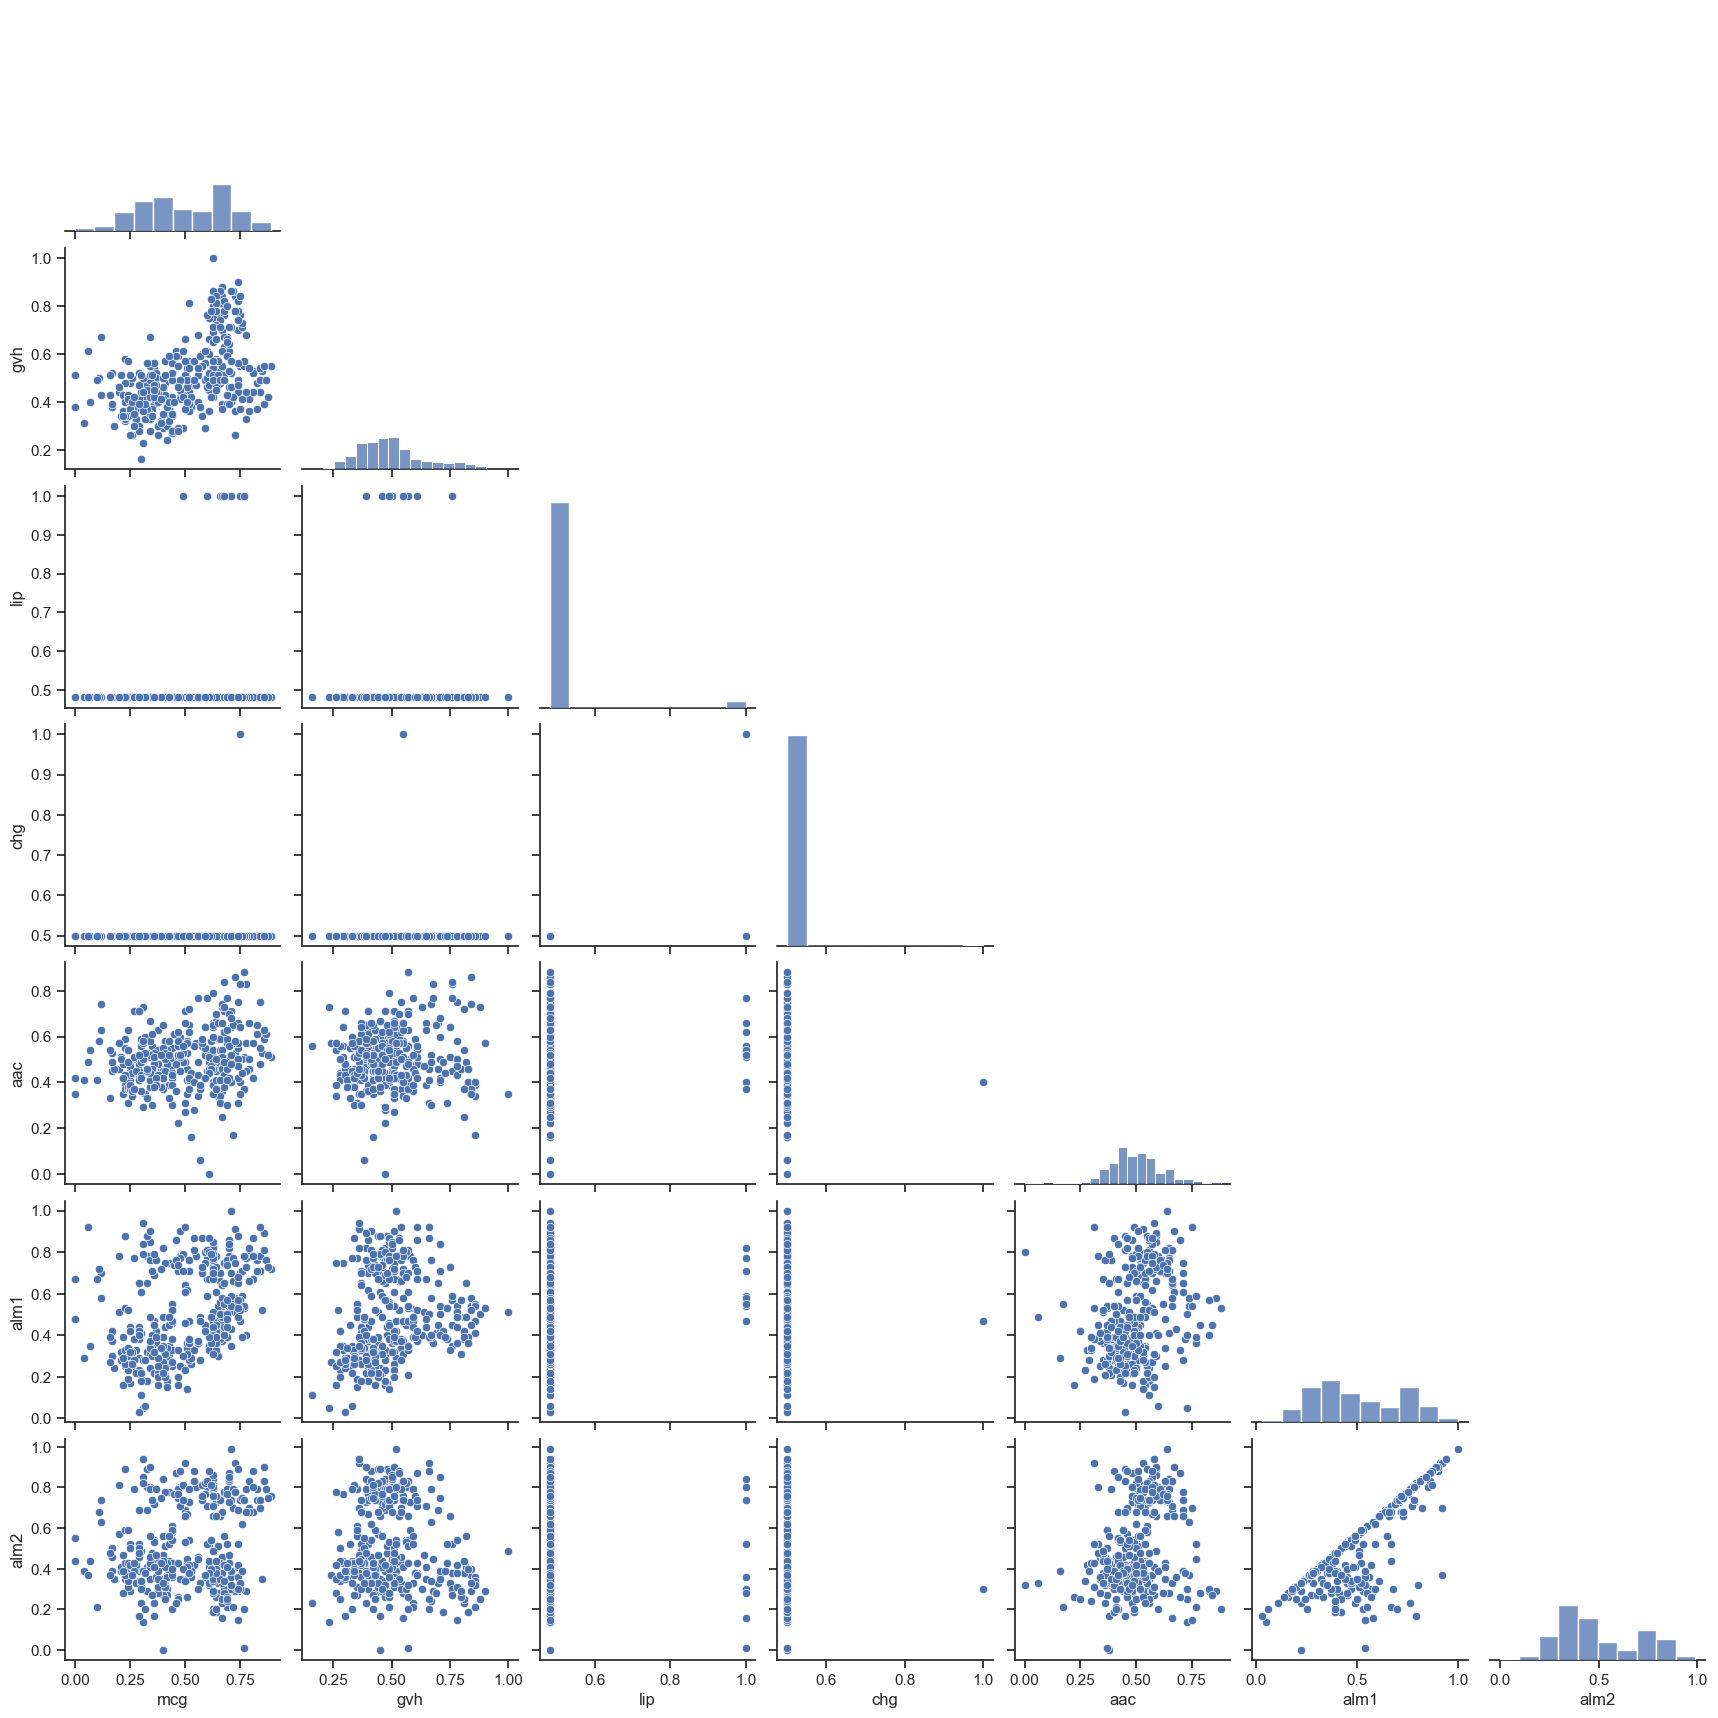

In [15]:
#Pair Plot
sbn.set(style = 'ticks')

trunc = df_ecoli.iloc[0:20,:]

sbn.pairplot(
    df_ecoli, 
    height=2.5, 
    corner=True,
    x_vars=["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"],
    y_vars=["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"],
)

# hue="class" - didn't use this because there are 336 classes so it took too long to plot.

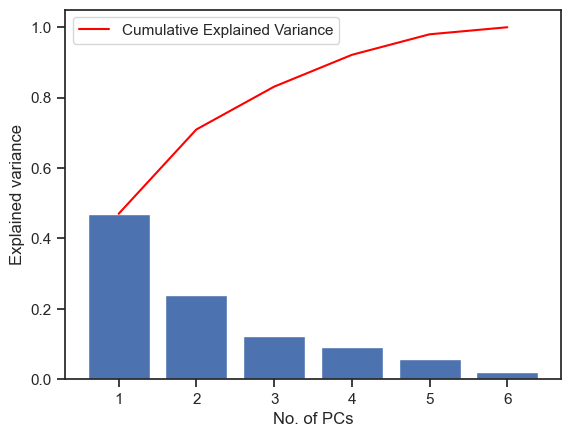

In [9]:
#Scree-Plot
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('No. of PCs')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

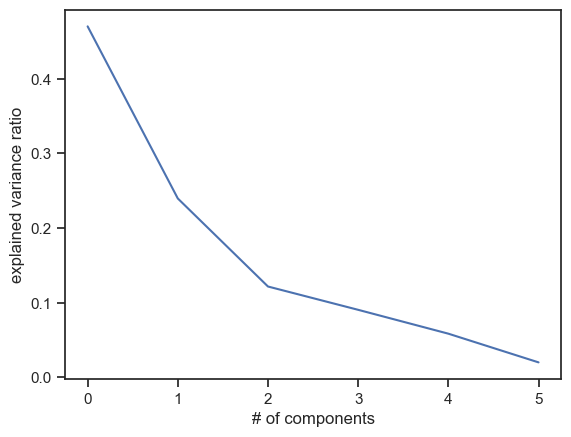

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# of components')
plt.ylabel('explained variance ratio')
plt.show()

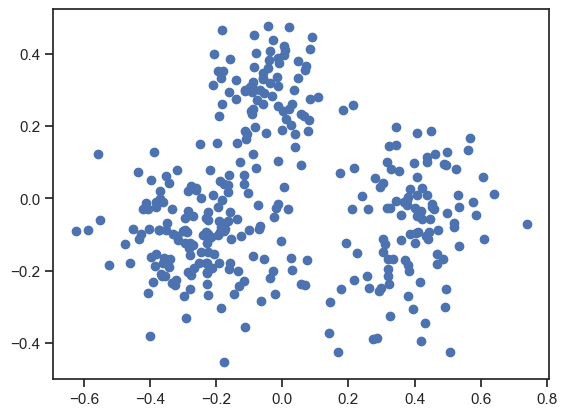

In [14]:
pc_ecoli = pca.fit_transform(X)
plt.scatter(pc_ecoli[:, 0], pc_ecoli[:, 1])